<a href="https://colab.research.google.com/github/Jose-Balocchi/Retail---Predicciones-de-ventas/blob/main/05_Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar biblioteca Pandas

In [91]:
import pandas as pd

predicciones = '/content/04 sales_predictions.csv'
df = pd.read_csv(predicciones)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Ahora revisaremos los datos

In [92]:
# numero de filas y columnas

df.shape

(8523, 12)

In [93]:
# Informacion general

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Que podemos sacar de esto:

**Datos faltantes: columnas Item_Weight y Outlet_size**


In [94]:
# Revisaremos si hay datos duplicados

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [95]:
# Con lo anterior no sabemos si hay duplicados, asi que sumaremos los True y nos daremos cuenta de que no hay duplicados.

df.duplicated().sum()

0

In [96]:
# Volvamos a los valores faltantes.

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [97]:
# Veamos un head de las columnas involucradas.

df['Item_Weight'].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [98]:
# Veamos los valores generales de esta columna

df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [99]:
# Veamos la moda y mediana

print('Moda')
df['Item_Weight'].mode()



Moda


0    12.15
Name: Item_Weight, dtype: float64

In [100]:
print('Mediana')
df['Item_Weight'].median()

Mediana


12.6

In [101]:
# El promedio esta bastante cerca de la moda y mediana, por lo que optare por esa opcion para rellenar los datos faltantes de esta columna

promedio = df['Item_Weight'].mean()

promedio



12.857645184135976

In [102]:
# Ahora rellenamos

df['Item_Weight'].fillna(promedio, inplace = True)

In [103]:
# Veamos si se rellenaron

df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [104]:
# Vamos a ver la otra columna ahora

df['Outlet_Size'].head()

0    Medium
1    Medium
2    Medium
3       NaN
4      High
Name: Outlet_Size, dtype: object

In [105]:
# Es una variable categorica.

# Veamos cuantos de cada una de las categorias hay

df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [106]:
# Dado que los valores faltantes son muchos, creare una categoria Otros y llenare con eso los datos

df['Outlet_Size'].fillna('Others', inplace = True)

In [107]:
df['Outlet_Size'].value_counts()

Medium    2793
Others    2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [108]:
# Veamos si se rellenaron

df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [109]:
# Veamos ahora si tenemos que corregir alguna otra variable

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [110]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [111]:
# Aca vemos que hay categorias duplicadas

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [112]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [113]:
# Veamos otra variable categorica

df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [114]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [115]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [116]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [117]:
# Ahora mostremos datos resumen para cada columna

df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


Vamos a explorar los datos a través de histogramas, boxplots, mapas de calor y correlación

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Axes: >

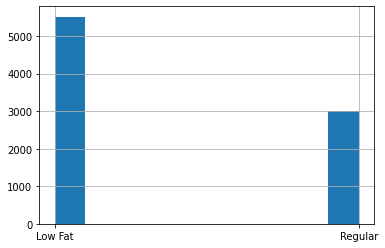

In [119]:
# Vamos con histogramas

df['Item_Fat_Content'].hist()

<Axes: >

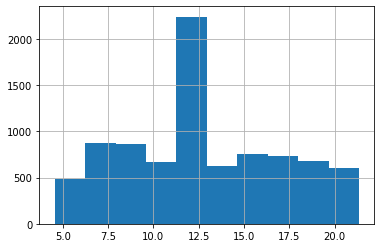

In [120]:
df['Item_Weight'].hist()

<Axes: >

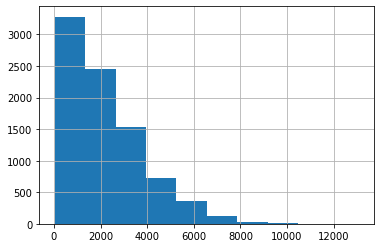

In [121]:
df['Item_Outlet_Sales'].hist()

In [122]:
# Ahora seria interesante comparar columnas. 

# Comparemos la columna tipo de outlet con las ventas 

# Lo primero es definir la serie de ventas

ventas = df['Item_Outlet_Sales']

In [123]:
tipo_de_outlet = df['Outlet_Type']
tipo_de_outlet

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

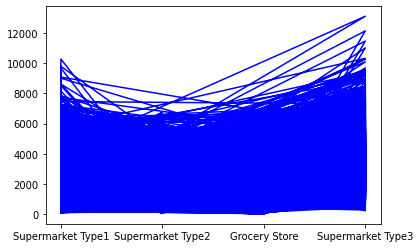

In [124]:
# vamos a ver si funciona un grafico que los relacione --- no funciona

plt.plot(tipo_de_outlet,ventas, 'b')

In [127]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Others,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [130]:
# esta info no es muy valiosa pero la dejaremos para ver como se ve un groupby de dos criterios graficados.
grafico_outlet = df.groupby(['Outlet_Type','Item_Fat_Content'])['Item_Outlet_Sales'].sum()
grafico_outlet


Outlet_Type        Item_Fat_Content
Grocery Store      Low Fat             2.406814e+05
                   Regular             1.273529e+05
Supermarket Type1  Low Fat             8.257521e+06
                   Regular             4.659822e+06
Supermarket Type2  Low Fat             1.201305e+06
                   Regular             6.505179e+05
Supermarket Type3  Low Fat             2.204588e+06
                   Regular             1.249338e+06
Name: Item_Outlet_Sales, dtype: float64

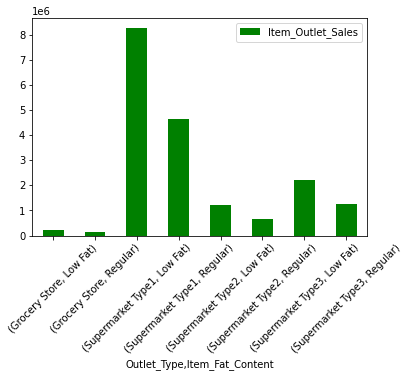

In [129]:
grafico_outlet.plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 45)
plt.legend()

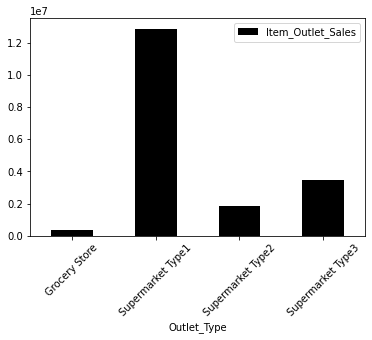

In [133]:
grafico_outlet2 = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
grafico_outlet2.plot(kind = 'bar', color = 'black')
plt.xticks(rotation = 45)
plt.legend()
# aca podemos ver la diferencia de ventas entre los tipos de locales

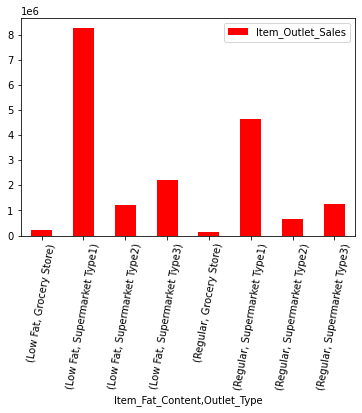

In [141]:
# ahora veremos la diferencia de ventas de los tipos de producto
grafico_tipo_comida = df.groupby(['Item_Fat_Content', 'Outlet_Type'])['Item_Outlet_Sales'].sum()
grafico_tipo_comida.plot(kind = 'bar', color = 'red')
plt.xticks(rotation = 80)
plt.legend()
# aca podemos